# **PROPERTY SALES IN CONNECTICUT, UNITED STATES OF AMERICA FROM 2001 TO 2018**

This dataset was obtained from data.gov 

Details of this project is contained in the readme file

In [54]:
#import the required libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore') #to prevent python from warning me 
%matplotlib inline  
import os #I use this to check for files locally before reading them into my notebook 

print ("Setup complete!")

Setup complete!


In [55]:
os.path.isfile("F:/Data Science/My Datasets/Real_Estate_Sales_2001-2018.csv")

True

In [56]:
filepath = "F:/Data Science/My Datasets/Real_Estate_Sales_2001-2018.csv"
real_estate = pd.read_csv(filepath)
print("Import successful")

Import successful


In [57]:
real_estate.shape

(912302, 13)

- There are 912,302 properties recorded and 12 features 

In [58]:
real_estate.head()

,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType,NonUseCode,Remarks,NumberOfBuildings
0,17001,2017,10/02/2017,Andover,27 HENDEE RD,58400.0,82000.0,0.712,NaN,Single Family,NaN,NaN,NaN
1,40043,2004,05/19/2005,Andover,BURNAP BRK RD,850.0,50000.0,1.700,Vacant Land,NaN,28,NaN,NaN
2,30070,2003,08/02/2004,Andover,ROUTE 6,157300.0,175000.0,89.880,Vacant Land,NaN,0,NaN,NaN
3,40036,2004,04/29/2005,Andover,ROUTE 6,22400.0,20000.0,112.000,Vacant Land,NaN,25,NaN,NaN
4,170003,2017,10/02/2017,Branford,22-24 SILVER ST,205500.0,357500.0,0.575,NaN,Two Family,NaN,NaN,NaN


In [59]:
real_estate['SerialNumber'].duplicated().sum()

845144

- Ideally there shouldn't be duplicates values in the Serial Number column. It ahould contain unique values. I believe the data was gathered from different tables. I'll skip it as it does not affect my analysis.

In [60]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912302 entries, 0 to 912301
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SerialNumber       912302 non-null  int64  
 1   ListYear           912302 non-null  int64  
 2   DateRecorded       912294 non-null  object 
 3   Town               912302 non-null  object 
 4   Address            912251 non-null  object 
 5   AssessedValue      911998 non-null  float64
 6   SaleAmount         881510 non-null  float64
 7   SalesRatio         911469 non-null  float64
 8   PropertyType       812319 non-null  object 
 9   ResidentialType    699105 non-null  object 
 10  NonUseCode         538939 non-null  object 
 11  Remarks            132036 non-null  object 
 12  NumberOfBuildings  50705 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 90.5+ MB


In [61]:
real_estate['SaleAmount'].fillna(0, inplace = True)

In [62]:
real_estate['PropertyType'] = real_estate['PropertyType'].astype('category')
real_estate['ResidentialType'] = real_estate['ResidentialType'].astype('category')
real_estate['NumberOfBuildings'] = real_estate['NumberOfBuildings'].astype('category')
real_estate['ListYear'] = real_estate['ListYear'].astype('category')

In [63]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912302 entries, 0 to 912301
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   SerialNumber       912302 non-null  int64   
 1   ListYear           912302 non-null  category
 2   DateRecorded       912294 non-null  object  
 3   Town               912302 non-null  object  
 4   Address            912251 non-null  object  
 5   AssessedValue      911998 non-null  float64 
 6   SaleAmount         912302 non-null  float64 
 7   SalesRatio         911469 non-null  float64 
 8   PropertyType       812319 non-null  category
 9   ResidentialType    699105 non-null  category
 10  NonUseCode         538939 non-null  object  
 11  Remarks            132036 non-null  object  
 12  NumberOfBuildings  50705 non-null   category
dtypes: category(4), float64(3), int64(1), object(5)
memory usage: 66.1+ MB


- There are some empty fields, It is expected beacause some features are prerequisites to others 

Now lets dive into explorinng the data to see how each feature affects the Sale Amount of the houses 

## List Year

In [64]:
year_grp = real_estate[['ListYear', 'SaleAmount']].groupby('ListYear', as_index = False).agg(['count', 'mean']).round()
year_grp = year_grp.sort_values(by = ('SaleAmount', 'mean'), ascending = False)
year_grp = year_grp.reset_index()
year_grp.rename(columns = {'SaleAmount': 'Features', 'count': 'Number of properties', 'mean':'Average Price', 
                           'ListYear':'Year Listed'}, inplace = True)
year_grp

Year Listed             Features              
               Number of properties Average Price
0         2016                49773      480371.0
1         2006                48775      445002.0
2         2007                35616      404454.0
3         2017                45692      393259.0
4         2018                50705      383738.0
5         2014                49563      378962.0
6         2013                39943      374854.0
7         2012                35973      370890.0
8         2011                31065      362343.0
9         2004                84056      361401.0
10        2005                61602      340838.0
11        2009                42508      332932.0
12        2015                46651      319619.0
13        2010                27755      306300.0
14        2003                64239      304686.0
15        2008                32734      304603.0
16        2002               106068      292113.0
17        2001                59584      234564.0

- As seen above most properties that were listed were listed in 2002, followed by 2004 then 2003

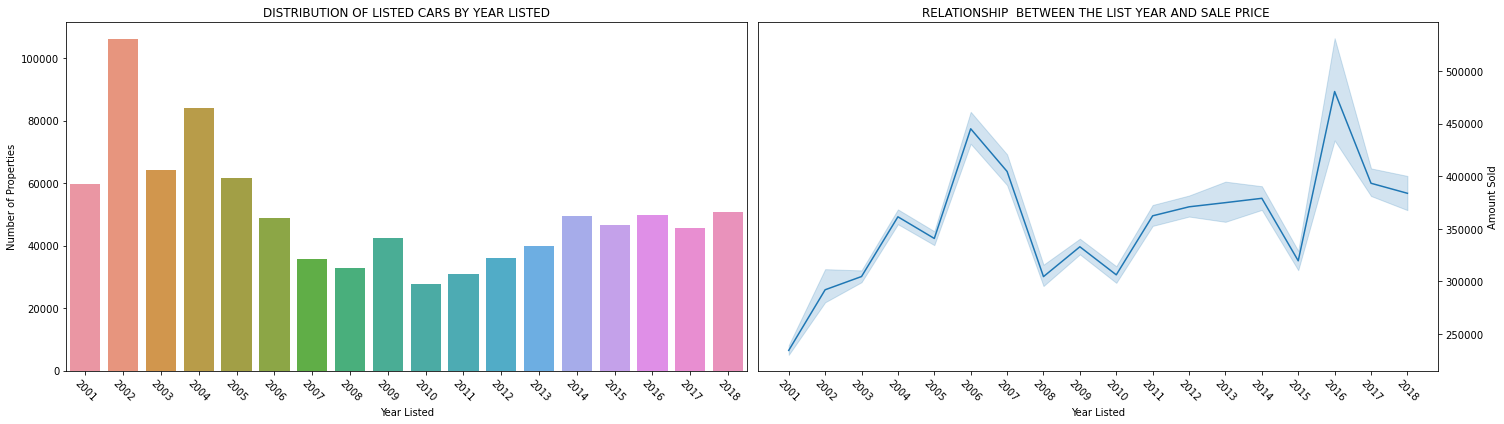

In [65]:
fig, ax = plt.subplots(1, 2, figsize = (21, 6))

sns.countplot('ListYear',data = real_estate, ax = ax[0])
ax[0].set_title("DISTRIBUTION OF LISTED CARS BY YEAR LISTED")
ax[0].set_xlabel("Year Listed")
ax[0].set_ylabel("Number of Properties")
ax[0].tick_params(axis = 'x', rotation = -45)

sns.lineplot('ListYear', 'SaleAmount', data = real_estate)
plt.setp(ax[1].get_xticklabels(), rotation = -45)
ax[1].set_title("RELATIONSHIP  BETWEEN THE LIST YEAR AND SALE PRICE ")
ax[1].set_xlabel("Year Listed")
ax[1].set_ylabel("Amount Sold")
ax[1].xaxis.set_ticks(real_estate['ListYear'].unique())
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.set_ticks_position('right')

plt.tight_layout()
plt.show()

- Generally the year the properties were listed affected the Sale amount althought there were some exeptions

## **Property Type**

In [66]:
type_grp = real_estate[['PropertyType', 'SaleAmount']].groupby('PropertyType', as_index = False).agg(['mean', 'count']).round()
type_grp = type_grp.sort_values(by = ('SaleAmount', 'mean'), ascending = False)
type_grp = type_grp.reset_index()
type_grp.rename(columns = {'SaleAmount':'Features', 'mean': 'Average Price', 'count': 'Number of Propertues',
                          'PropertyType': 'Property Type'}, inplace = True)
type_grp

Property Type      Features                     
                  Average Price Number of Propertues
0      Apartments     1122859.0                 5949
1      Commercial      948555.0                32262
2      Industrial      884586.0                 4181
3     Residential      339390.0               602891
4  Public Utility      210158.0                  141
5           Condo      209924.0               120528
6     Vacant Land      186577.0                46356
7  10 Mill Forest      166378.0                   11

-  As seen above most properties are Residential properties followed by Condo then Vacant lands and Apartments have the highest average price 

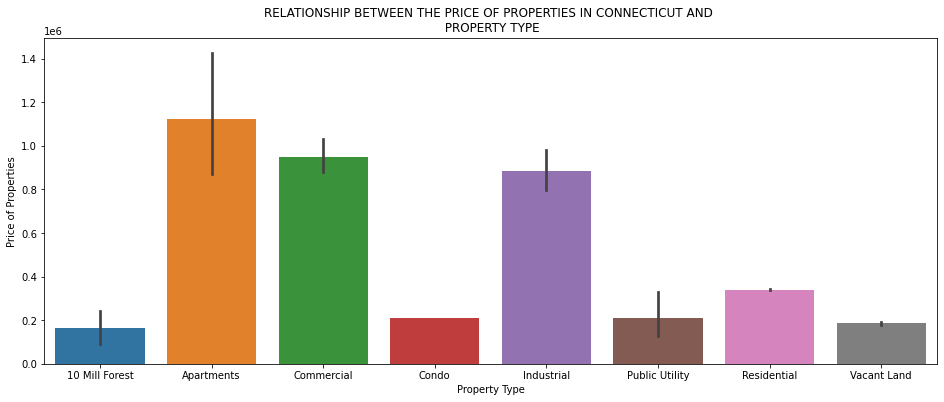

In [67]:
plt.figure(figsize = (16, 6))
sns.barplot( 'PropertyType','SaleAmount', data = real_estate)
plt.ylabel("Price of Properties")
plt.xlabel("Property Type")
plt.title("RELATIONSHIP BETWEEN THE PRICE OF PROPERTIES IN CONNECTICUT AND \n PROPERTY TYPE")
plt.show()

- Generally It can be said that the type of property affects the sale price of the properties

## **Residential Type**

In [68]:
print("NUMBER OF PROPERTIES BY RESIDENTIAL TYPE")
print(real_estate['ResidentialType'].value_counts())

NUMBER OF PROPERTIES BY RESIDENTIAL TYPE
Single Family     614927
Two Family         39037
Three Family       19453
Condo Family       16180
Vacant Land         3555
Commercial          3297
Four Family         1332
Apartments           543
Industrial           404
Residential          292
Multi Family          76
Public Utility         9
Name: ResidentialType, dtype: int64


- Most of the properties are Single family residential types 

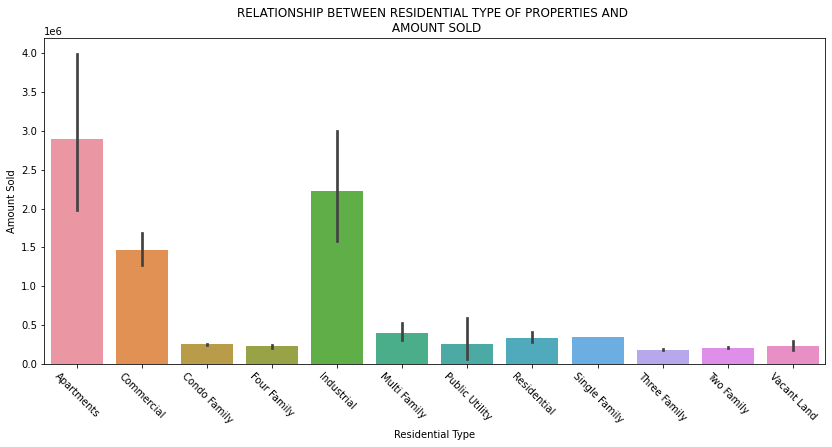

In [69]:
plt.figure(figsize = (14, 6))
sns.barplot( 'ResidentialType','SaleAmount', data = real_estate)
plt.xticks(rotation = -45)
plt.xlabel('Residential Type')
plt.ylabel('Amount Sold')
plt.title("RELATIONSHIP BETWEEN RESIDENTIAL TYPE OF PROPERTIES AND \n AMOUNT SOLD")
plt.show()

## **Assesed Value and Sale Amount**

In [90]:
real_estate['Sale difference'] = real_estate['SaleAmount'] - real_estate['AssessedValue']
real_estate['Percentage difference'] = (real_estate['Sale difference']/real_estate['SaleAmount']) * 100
real_estate['Percentage difference'] = real_estate['Percentage difference'].round()

In [91]:
real_estate.head()

,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType,NonUseCode,Remarks,NumberOfBuildings,Sale difference,Percentage difference
0,17001,2017,10/02/2017,Andover,27 HENDEE RD,58400.0,82000.0,0.712,NaN,Single Family,NaN,NaN,NaN,23600.0,29.0
1,40043,2004,05/19/2005,Andover,BURNAP BRK RD,850.0,50000.0,1.700,Vacant Land,NaN,28,NaN,NaN,49150.0,98.0
2,30070,2003,08/02/2004,Andover,ROUTE 6,157300.0,175000.0,89.880,Vacant Land,NaN,0,NaN,NaN,17700.0,10.0
3,40036,2004,04/29/2005,Andover,ROUTE 6,22400.0,20000.0,112.000,Vacant Land,NaN,25,NaN,NaN,-2400.0,-12.0
4,170003,2017,10/02/2017,Branford,22-24 SILVER ST,205500.0,357500.0,0.575,NaN,Two Family,NaN,NaN,NaN,152000.0,43.0


- The difference between the Sale Amount and the Actual Price has been added to the columns and also the percentage of the difference